<a href="https://colab.research.google.com/github/FerrazThales/demand_forecasting_prophet/blob/main/Demand_Forecasting_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>Encontre eu e meus projetos nas redes sociais!</b></h1>
<table>
  <tr>
  <td><a href="https://thalesferraz.medium.com/">
  <img src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true" width="800" title="Olá, Meu nome é Thales e sou cientista de Dados!"/>
  </a>
  </td>
  <td><a href="https://github.com/FerrazThales">
  <img hspace=30 vspace=110 src="https://image.flaticon.com/icons/png/512/1051/1051326.png" width="60%" title="Entre em meu Github e veja mais projetos!" /> 
  </a>
  </td>
  <td>
  <a href="">
  <img vspace=110 src="https://download.logo.wine/logo/Medium_(website)/Medium_(website)-Logo.wine.png" width="800" title="Veja este meu projeto no Medium!"/>
  </a>
  </td>
  <td><a href="https://www.linkedin.com/in/thalesdefreitasferraz/"><img vspace=150 src="https://image.flaticon.com/icons/png/512/889/889122.png" width="40%" title="Vamos trocar uma idéia sobre Data Science no LinkedIn?" />
  </a>
  </td>
  </tr>
</table>

# O que você vai aprender nesta análise:

* x.
* x.
* x.
* x.

# Texto Sobre previsão de demanda e vinhos

texto texto texto

<p align="center">
  <img src="https://image.freepik.com/fotos-gratis/copo-de-vinho-tinto-e-garrafa-no-balcao-de-bar_107420-65845.jpg">
</p>

texto

O objetivo desse projeto é prever a demanda por vinhos em lojas especializadas em vinho. Para esse projeto, temos 2 datasets, um sobre o catálogo de vinhos da loja e outro sobre as vendas.

Nesse projeto, é VITAL que haja MUITA ATENÇÃO sobre os detalhes mencionados que permeiam as análise de séries temporais. É um projeto que demanda muita atenção e cuidado, e uma documentação feita minuciosamente.

In [ ]:
#bibliotecas de operações matemáticas e análise/leitura de dados
import numpy as np
import pandas as pd

#bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#módulo de time series do facebook
from fbprophet import Prophet

# Obtenção e ajuste dos dados

falar que pegou do rafael que era um desafio do curso

se divide em duas bases, produtos e vendas


## Base de Dados dos produtos

texto

### Dicionário das Variáveis:

* `item_id`: código do vinho na adega.
* `name`: nome do vinho.
* `producer`: nome do produtor do vinho.
* `country`: país de origem do vinho.
* `region`: região de produção do vinho.
* `vintage`: ano da safra.
* `kind`: tipo do vinho.

 * *Sparkling* : Espumante
 * *Rose Sparkling* : Espumante Rose
 * *White* : Branco
 * *Rosé* : Rosé
 * *Red* : Tinto
* `price_brl`: preço unitário do vinho em real na época em que os dados foram levantados.
* `price_usd`: preço unitário do vinho em dólar na época em que os dados foram levantados.

In [ ]:
#endereco dos dados sobre produos
endereco_produtos = "https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/products.csv"

#guardando os dados sobre produtos
produtos = pd.read_csv(endereco_produtos)

#mostrando as 5 primeiras entrada dos dados de produtos
produtos.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.60,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,489.00,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.00,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.40,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,"1,548.00",267.82


texto sobre a quantidade de vinhos  e suas variáveis

In [ ]:
print('A Base de dados sobre produtos contém:')
print('{} entradas e {} variáveis'.format(produtos.shape[0], produtos.shape[1]))

A Base de dados sobre produtos contém:
219 entradas e 9 variáveis


avaliar o tipo de dados

In [ ]:
#avaliando o tipo de dados
pd.DataFrame(produtos.dtypes,columns=['Tipo de Dados'])

,Tipo de Dados
item_id,int64
name,object
producer,object
country,object
region,object
vintage,object
kind,object
price_brl,object
price_usd,object


texto falando sobre float e vírgula pq o regex precisa ser true

In [ ]:
#tirando as vírgulas dos valores
produtos.replace(',','',inplace=True,regex=True)

#mudança da variável price_brl
produtos.price_brl = produtos.price_brl.astype('float64')

#mudança da variável price_usd
produtos.price_usd = produtos.price_usd.astype('float64')

#mudança da variável item_id
produtos.item_id = produtos.item_id.astype('str')

In [ ]:
pd.DataFrame(produtos.dtypes,columns=['Tipo de Dados após mudança'])

,Tipo de Dados após mudança
item_id,object
name,object
producer,object
country,object
region,object
vintage,object
kind,object
price_brl,float64
price_usd,float64


ver dados vazios

In [ ]:
#verificando a quantidade de dados vazios na base de dados dos produtos
pd.DataFrame(produtos.isnull().sum(),columns=['Quantidade de Valores Ausentes'])

,Quantidade de Valores Ausentes
item_id,0
name,0
producer,0
country,0
region,0
vintage,0
kind,0
price_brl,0
price_usd,0


## Base de dados das Vendas

### Dicionário das Variáveis:

* `date`: data em que a venda foi realizada.
* `store`: código da loja.
* `item`: código do vinho na adega.
* `sales`: quantidade de vinhos vendidos.

In [ ]:
#endereco dos dados sobre vendas
endereco_vendas = "https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/sales-clean.csv"

#guardando os dados sobre vendas
vendas = pd.read_csv(endereco_vendas)

#mostrando as 5 primeiras entrada dos dados de vendas
vendas.head()

,date,store,item,sales
0,2018-01-01,1,1,13
1,2018-01-02,1,1,11
2,2018-01-03,1,1,14
3,2018-01-04,1,1,13
4,2018-01-05,1,1,10


ver quantidade de dados e variáveis

In [ ]:
print('A Base de dados sobre vendas contém:')
print('{:,} entradas e {} variáveis'.format(vendas.shape[0], vendas.shape[1]).replace(',','.'))

A Base de dados sobre vendas contém:
720.071 entradas e 4 variáveis


falar da inconsistência da data, falar do date time

In [ ]:
#vendo as 5 últimas entradas da base de dados sobre vendas
vendas.tail()

,date,store,item,sales
720066,12/27/2020,3,219,71
720067,12/28/2020,3,219,28
720068,12/29/2020,3,219,75
720069,12/30/2020,3,219,135
720070,12/31/2020,3,219,91


In [ ]:
#buscando os valores que começam a ter barra nas datas, o primeiro índice é 164.401
vendas[vendas.date.str.contains('/')]

,date,store,item,sales
164401,1/3/2018,1,51,61
164402,1/4/2018,1,51,21
164403,1/5/2018,1,51,142
164404,1/6/2018,1,51,142
164405,1/7/2018,1,51,54
...,...,...,...,...
720066,12/27/2020,3,219,71
720067,12/28/2020,3,219,28
720068,12/29/2020,3,219,75
720069,12/30/2020,3,219,135


In [ ]:
#transformando a variável do tipo object em date
vendas.date = pd.to_datetime(vendas.date)

#mostrando as últimas entradas após o ajuste
vendas.tail()

,date,store,item,sales
720066,2020-12-27,3,219,71
720067,2020-12-28,3,219,28
720068,2020-12-29,3,219,75
720069,2020-12-30,3,219,135
720070,2020-12-31,3,219,91


avaliando o tipo de dados, falar do datetime64 e int64, explicar que vai ter que mudar os dados da store e item

In [ ]:
pd.DataFrame(vendas.dtypes,columns=['Tipo de Dados'])

,Tipo de Dados
date,datetime64[ns]
store,int64
item,int64
sales,int64


In [ ]:
#alterando o tipo de dados da variável item para string
vendas.item = vendas.item.astype('str')

#alterando o tipo de dados da variável store para string
vendas.store = vendas.store.astype('str')

avaliando a quantidade de dados vazios

In [ ]:
pd.DataFrame(vendas.isnull().sum(),columns=['Quantidade de Dados Ausentes'])

,Quantidade de Dados Ausentes
date,0
store,0
item,0
sales,0


## Juntando as duas bases de dados

texto sobre a junção das duas bases de dados [artigo](https://medium.com/data-hackers/pandas-combinando-data-frames-com-merge-e-concat-10e7d07ca5ec), falar do que há em comum entre as tabelas.

<p align="center">
  <img src="https://miro.medium.com/max/700/1*0FDsAB9OelxojfmtkcLbgw.png"
</p>

In [ ]:
#códigos para juntar as duas bases de dados
df = pd.merge(produtos,vendas,left_on='item_id',right_on='item')

#mudando a variável data para o índice
df.set_index('date',inplace=True)

#retirando a coluna item duplicada
df.drop('item',axis=1,inplace=True)

algumas novas variáveis

In [ ]:
#receitas em dólares
df['revenue_usd'] = df.sales * df.price_usd

#receitas em reais
df['revenue_brl'] = df.sales * df.price_brl

#ano da vendas
df['year'] = df.index.year

#mês das vendas
df['month'] =  df.index.month_name()

#dia das vendas
df['day'] = df.index.day

#dia da semana
df['day_of_week'] = df.index.dayofweek

#nome do dia na semana
df['day_name'] = df.index.day_name()

#final de semana
df['weekend'] = df.day_of_week > 4

In [ ]:
#visualizando as 5 primeiras entradas após a junção dos dados e novas variáveis
df.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,store,sales,revenue_usd,revenue_brl,year,month,day,day_of_week,day_name,weekend
date,,,,,,,,,,,,,,,,,,,
2018-01-01,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,1,13,763.75,4414.8,2018,January,1,0,Monday,False
2018-01-02,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,1,11,646.25,3735.6,2018,January,2,1,Tuesday,False
2018-01-03,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,1,14,822.50,4754.4,2018,January,3,2,Wednesday,False
2018-01-04,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,1,13,763.75,4414.8,2018,January,4,3,Thursday,False
2018-01-05,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,1,10,587.50,3396.0,2018,January,5,4,Friday,False


# Análise Exploratória dos Dados

texto texto

In [ ]:
#@title Utilizaremos vários gráficos ao longo deste notebook. A função de ajustes de layouts está nesse célula.
def ajuste_layout(i):
  ax[i].set_frame_on(False)
  ax[i].tick_params(axis='both',length=0,colors='grey')
  ax[i].grid(False)

falar das estatísticas descritivas

In [ ]:
df.describe().round(1)

,price_brl,price_usd,sales,revenue_usd,revenue_brl,year,day,day_of_week
count,720071.0,720071.0,720071.0,720071.0,720071.0,720071.0,720071.0,720071.0
mean,967.6,167.4,70.6,12136.5,70149.2,2019.0,15.7,3.0
std,1406.4,243.3,41.4,22347.8,129170.3,0.8,8.8,2.0
min,52.8,9.1,1.0,9.1,52.8,2016.0,1.0,0.0
25%,259.2,44.8,35.0,2252.2,13018.5,2018.0,8.0,1.0
50%,509.4,88.1,67.0,5050.9,29193.0,2019.0,16.0,3.0
75%,949.2,164.2,104.0,11424.0,66033.0,2020.0,23.0,5.0
max,10992.0,1901.7,196.0,285259.5,1648800.0,2020.0,31.0,6.0


vinho mais caro, vinho mais barato

In [63]:
print('O vinho mais caro do catálogo é o {} que custa cerca USD {:,}\n'.format(df[df.price_usd == df.price_usd.max()].name[0],
                                                                             df.price_usd.max()))

print('O vinho mais barato do catálogo é o {} que custa cerca USD {:,}'.format(df[df.price_usd == df.price_usd.min()].name[0],
                                                                             df.price_usd.min()))

O vinho mais caro do catálogo é o Domaine Ponsot Clos de La Roche Grand Cru Cuvee Vieilles Vignes - Magnum que custa cerca USD 1,901.73

O vinho mais barato do catálogo é o Cava Juvé & Camps Cinta Purpura Reserva Brut - 375ml (Half Bottle) que custa cerca USD 9.13


verificar ganhos por ano e por final de semana

ver histogramas dos preços e vendas, colocar tons de azul diferentes, mudar o eixo y

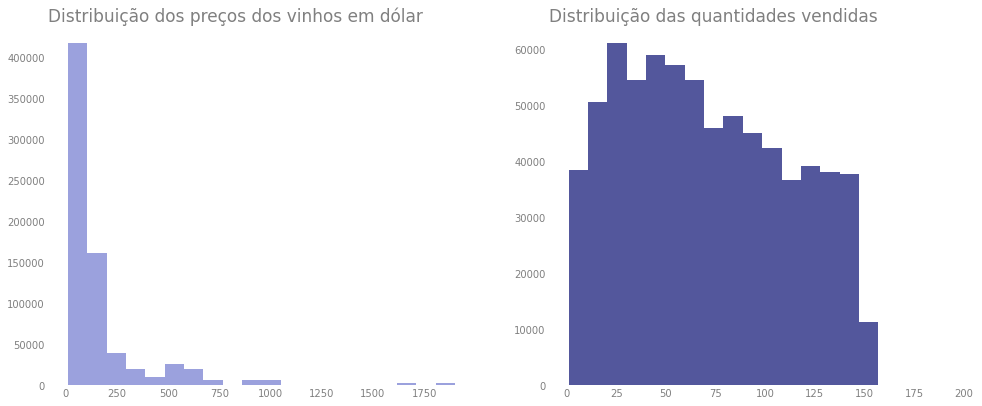

In [ ]:
#criando a fig e ax no matplotlib
fig, ax = plt.subplots(figsize=(14,6), ncols=2)

#criação do primeiro histograma
df.price_usd.hist(ax=ax[0],xlabelsize=10,ylabelsize=10,bins=20,color='#3944bc',alpha=0.5)
ax[0].set_title('Distribuição dos preços dos vinhos em dólar',loc='left',pad=5,fontdict={'fontsize':17},color='grey')
ajuste_layout(0)

#criação do segundo histograma
df.sales.hist(ax=ax[1],xlabelsize=10,ylabelsize=10,bins=20,color='#0a1172',alpha=0.7)
ax[1].set_title('Distribuição das quantidades vendidas',loc='left',pad=5,fontdict={'fontsize':17},color='grey')
ajuste_layout(1)

#plotando os gráficos
plt.tight_layout(pad=2.0)

fazer um boxplot apenas das lojas, vendas e dinheiro

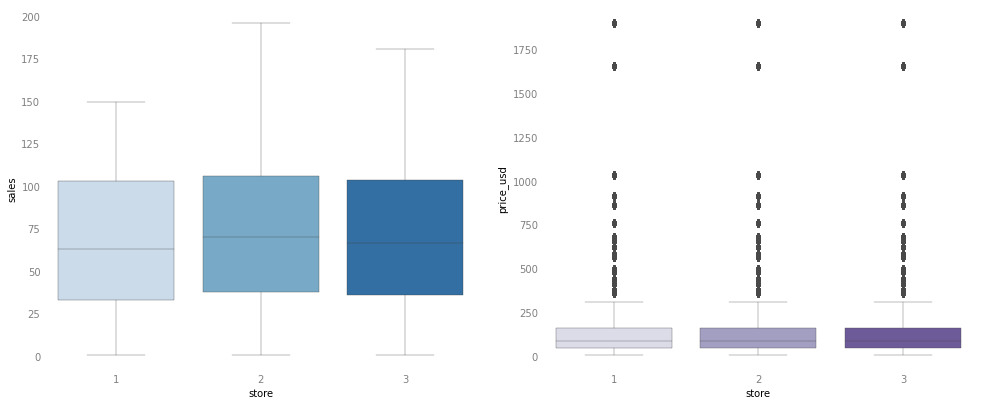

In [43]:
#criando a fig e ax no matplotlib
fig, ax = plt.subplots(figsize=(14,6), ncols=2)

#criando o primeiro gráfico
sns.boxplot(data=df,x='store',y='sales',ax=ax[0],palette='Blues',linewidth=0.35)
ajuste_layout(0)

#criando o segundo gráfico
sns.boxplot(data=df,x='store',y='price_usd',ax=ax[1],palette='Purples',linewidth=0.35)
ajuste_layout(1)

#plotando os gráficos
plt.tight_layout(pad=2.0)

fazer um boxplot geral, vendas e dinheiro em dólar

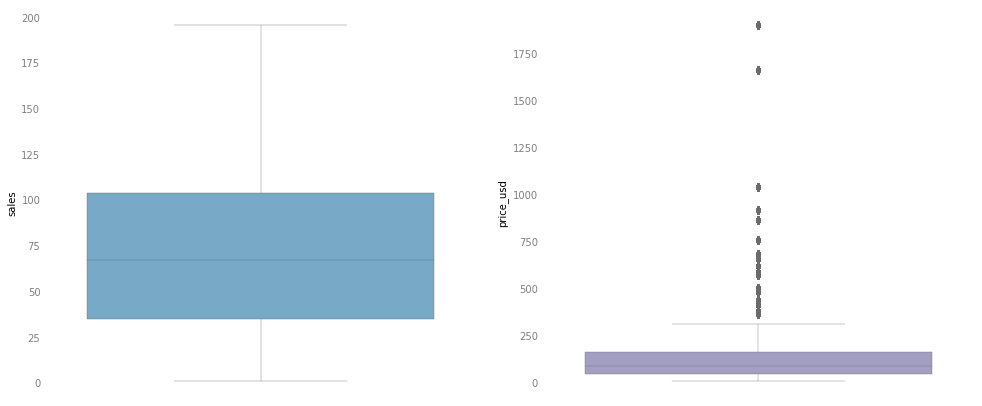

In [45]:
#criando a fig e ax no matplotlib
fig, ax = plt.subplots(figsize=(14,6), ncols=2)

#criando o primeiro gráfico
sns.boxplot(data=df,y='sales',ax=ax[0],palette='Blues',linewidth=0.35)
ajuste_layout(0)

#criando o segundo gráfico
sns.boxplot(data=df,y='price_usd',ax=ax[1],palette='Purples',linewidth=0.35)
ajuste_layout(1)

#plotando os gráficos
plt.tight_layout(pad=2.0)

#Preparando dos Dados para o Prophet

explicar o que é prophet